<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Dissertation/ANN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [201]:
df = pd.read_csv("VIX_02112011_02112019.csv")
# Ref: https://mc.ai/an-introduction-on-time-series-forecasting-with-simple-neura-networks-lstm/

In [202]:
print(df.head())

         Date       Open       High    Low      Close  Adj Close  Volume
0  2011-02-11  16.530001  16.530001  15.55  15.690000  15.690000       0
1  2011-02-14  16.070000  16.260000  15.22  15.950000  15.950000       0
2  2011-02-15  16.299999  16.750000  16.27  16.370001  16.370001       0
3  2011-02-16  16.309999  16.740000  15.84  16.719999  16.719999       0
4  2011-02-17  17.010000  17.299999  15.88  16.590000  16.590000       0


In [203]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
ind_df = df.set_index(['Date'], drop=True)
ind_df.head()

,Adj Close
Date,
2011-02-11,15.690000
2011-02-14,15.950000
2011-02-15,16.370001
2011-02-16,16.719999
2011-02-17,16.590000


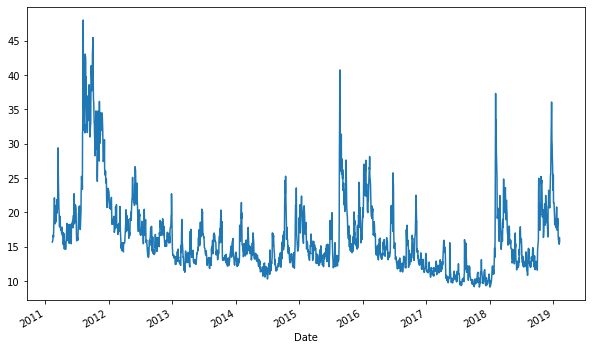

In [204]:
ind_df = ind_df.sort_index()
plt.figure(figsize=(10, 6))
ind_df['Adj Close'].plot();

In [205]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
ind_df_re = scaler.fit_transform(ind_df)
ind_df_re

array([[-0.66289243],
       [-0.64951107],
       [-0.62789496],
       ...,
       [-0.67884714],
       [-0.62789496],
       [-0.66134843]])

In [206]:
ind_df['Adj Close'] = ind_df_re
ind_df

,Adj Close
Date,
2011-02-11,-0.662892
2011-02-14,-0.649511
2011-02-15,-0.627895
2011-02-16,-0.609882
2011-02-17,-0.616572
...,...
2019-02-04,-0.660834
2019-02-05,-0.669068
2019-02-06,-0.678847


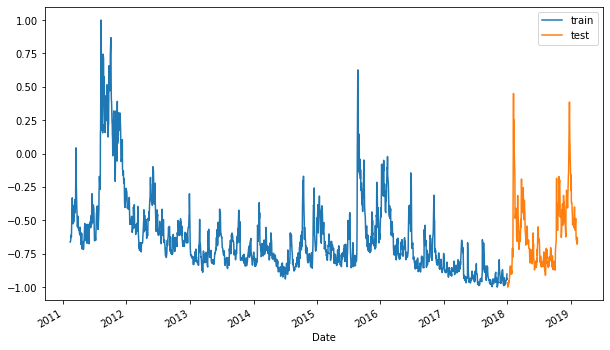

In [207]:
split_date = pd.Timestamp('2018-01-01')
df =  ind_df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [208]:
# np.random.shuffle(train)

In [209]:
X_train = train[:-1]
y_train = train[1:]
X_test = test[:-1]
y_test = test[1:]

In [210]:
X_train

Date
2011-02-11   -0.662892
2011-02-14   -0.649511
2011-02-15   -0.627895
2011-02-16   -0.609882
2011-02-17   -0.616572
                ...   
2017-12-21   -0.975296
2017-12-22   -0.960885
2017-12-26   -0.942872
2017-12-27   -0.931549
2017-12-28   -0.946475
Name: Adj Close, Length: 1732, dtype: float64

In [211]:
y_train

Date
2011-02-14   -0.649511
2011-02-15   -0.627895
2011-02-16   -0.609882
2011-02-17   -0.616572
2011-02-18   -0.624807
                ...   
2017-12-22   -0.960885
2017-12-26   -0.942872
2017-12-27   -0.931549
2017-12-28   -0.946475
2017-12-29   -0.902213
Name: Adj Close, Length: 1732, dtype: float64

In [212]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='sigmoid'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=1000, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/1000
1732/1732 [==============================] - 2s 903us/step - loss: 0.0613
Epoch 2/1000
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0131
Epoch 3/1000
1732/1732 [==============================] - 1s 838us/step - loss: 0.0084
Epoch 4/1000
1732/1732 [==============================] - 1s 844us/step - loss: 0.0070
Epoch 5/1000
1732/1732 [==============================] - 1s 850us/step - loss: 0.0066
Epoch 6/1000
1732/1732 [==============================] - 1s 845us/step - loss: 0.0065
Epoch 7/1000
1732/1732 [==============================] - 1s 831us/step - loss: 0.0064
Epoch 8/1000
1732/1732 [==============================] - 1s 849us/step - loss: 0.0064
Epoch 9/1000
1732/1732 [==============================] - 1s 863us/step - loss: 0.0064
Epoch 10/1000
1732/1732 [==============================] - 2s 878us/step - loss: 0.0064
Epoch 11/1000
1732/1732 [==============================] - 2s 892us/step - loss: 0.0064
Epoch 12/1000
1732/1732 [==================

In [213]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.896
The R2 score on the Test set is:	0.786


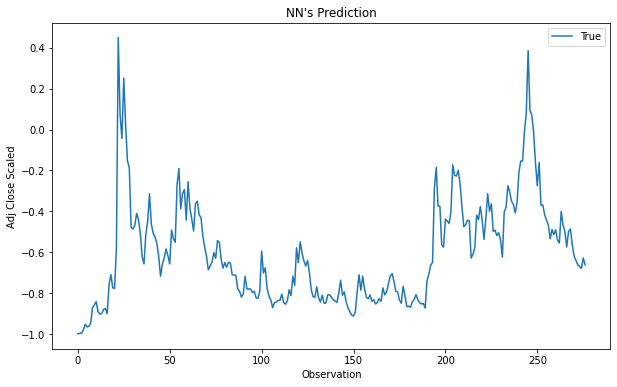

In [214]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True')
# plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()

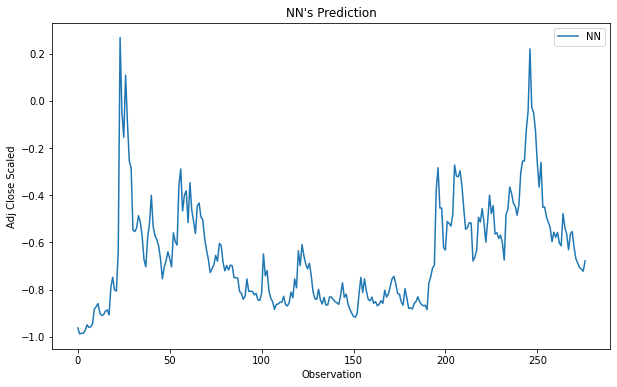

In [215]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test.values, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()

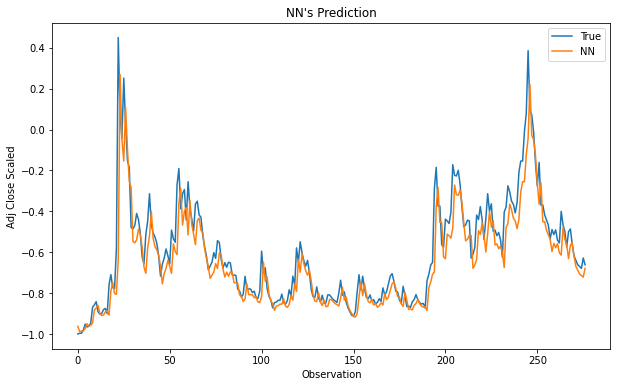

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()